In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('bmi.csv')

In [5]:
df.shape

(10000, 3)

In [6]:
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>

In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


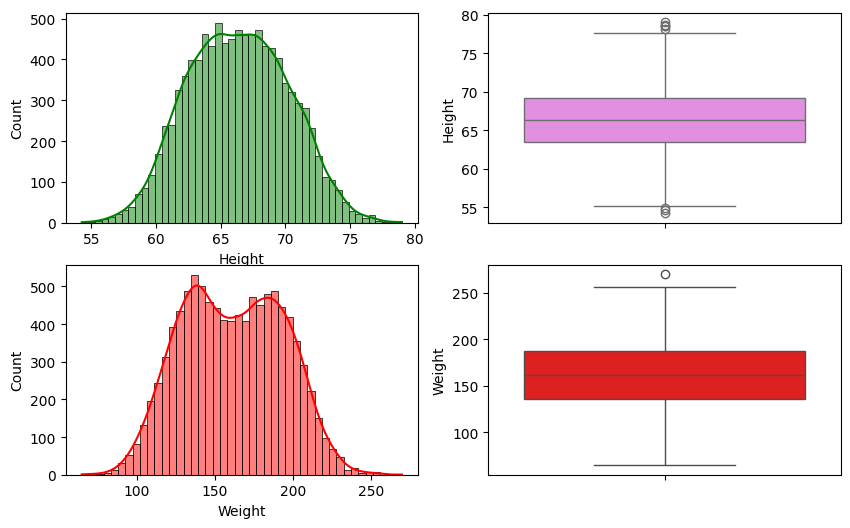

In [14]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))
sns.histplot(df['Height'],ax=ax1,color='green',kde=True)
sns.boxplot(df['Height'],ax=ax2,color='violet')
sns.histplot(df['Weight'],ax=ax3,color='red',kde=True)
sns.boxplot(df['Weight'],ax=ax4,color='red')
plt.show()

In [34]:
upper_limith=df['Height'].quantile(0.99)
lower_limith=df['Height'].quantile(0.01)

upper_limitw=df['Weight'].quantile(0.99)
lower_limitw=df['Weight'].quantile(0.01)

df[(df['Height']>upper_limith)| (df['Height']<lower_limith)]

df[(df['Weight']>upper_limitw)| (df['Weight']<lower_limitw)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
23,Male,75.205974,228.761781
82,Male,73.826127,237.916736
190,Male,76.709835,235.035419
191,Male,72.571121,230.560535
...,...,...,...
9761,Female,56.975279,90.341784
9775,Female,60.025950,87.035416
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957


In [ ]:
# new_height = df[(df['Height']<upper_limit)& (df['Height']>lower_limit)]

In [37]:
filtered_df = df[
    (df['Height'] > lower_limith) & (df['Height'] < upper_limith) &
    (df['Weight'] > lower_limitw) & (df['Weight'] < upper_limitw)
]

In [38]:
filtered_df

,Gender,Height,Weight
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


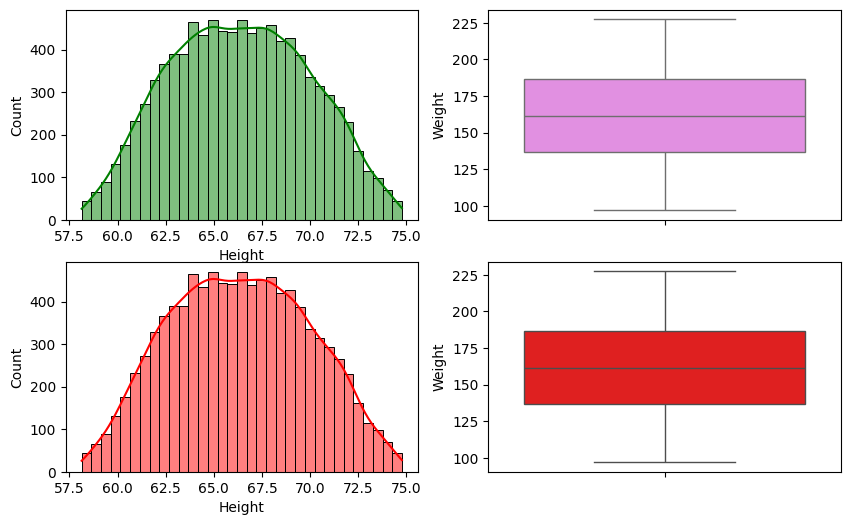

In [39]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))
sns.histplot(filtered_df['Height'],ax=ax1,color='green',kde=True)
sns.boxplot(filtered_df['Weight'],ax=ax2,color='violet')
sns.histplot(filtered_df['Height'],ax=ax3,color='red',kde=True)
sns.boxplot(filtered_df['Weight'],ax=ax4,color='red')
plt.show()

### capping


In [40]:
new=df.copy()

In [46]:
new['Height'] = np.where(

        df['Height']>=upper_limith,
        upper_limith,
        np.where(

            df['Height']<=lower_limith,
            lower_limith,
            df['Height']


        )



)

<Axes: >

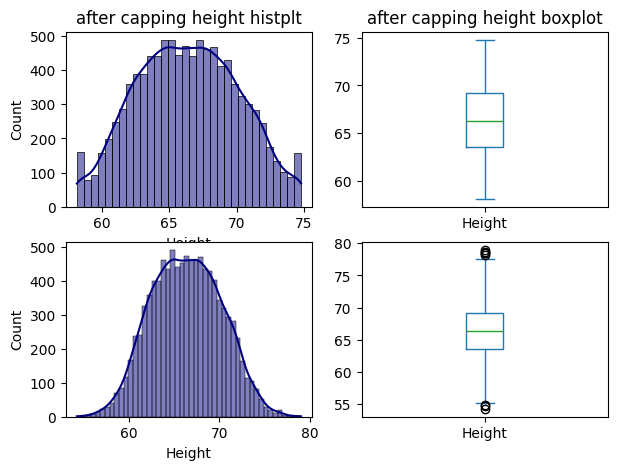

In [56]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2  ,figsize=(7, 5))
sns.histplot(new['Height'],ax=ax1,color='navy',kde=True)
ax1.set_title("after capping height histplt")
new['Height'].plot(kind='box',ax=ax2)
ax2.set_title("after capping height boxplot")
sns.histplot(df['Height'],ax=ax3,color='navy',kde=True)

df['Height'].plot(kind='box',ax=ax4)

In [57]:
800


800